In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR,SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [3]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y=data[['전국 관객수']]
y1=data[['전국 관객수 분류']]

In [4]:
scaler=StandardScaler()
feature_to_scale=['전국 스크린수','러닝타임','네티즌 평점','경쟁작']
feature_to_scale1=['전국 스크린수','러닝타임','네티즌 평점']
feature_to_scale2=['전국 스크린수','네티즌 평점']
scale=scaler.fit_transform(data[feature_to_scale])
scale1=scaler.fit_transform(data[feature_to_scale1])
scale2=scaler.fit_transform(data[feature_to_scale2])
X[feature_to_scale]=scale
X1[feature_to_scale1]=scale1
X2[feature_to_scale2]=scale2

<ipython-input-4-2b440a3bce64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_to_scale]=scale
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-4-2b440a3bce64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [5]:
#서포트 벡터 머신(분류, linear)
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,100):
    svc=SVC(kernel='linear',C=i/50)
    svc1=SVC(kernel='linear',C=i/50)
    svc2=SVC(kernel='linear',C=i/50)

    svc.fit(X_train,y1_train)
    svc1.fit(X_train1,y1_train1)
    svc2.fit(X_train2,y1_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(svc.score(X_train,y1_train)))
    print("평가 데이터 점수 : {}".format(svc.score(X_test,y1_test)))
    print("학습 데이터 점수1 : {}".format(svc1.score(X_train1,y1_train1)))
    print("평가 데이터 점수1 : {}".format(svc1.score(X_test1,y1_test1)))
    print("학습 데이터 점수2 : {}".format(svc2.score(X_train2,y1_train2)))
    print("평가 데이터 점수2 : {}".format(svc2.score(X_test2,y1_test2)))
    t.loc[i-1]=[i/50,svc.score(X_test,y1_test)]
    t1.loc[i-1]=[i/50,svc1.score(X_test1,y1_test1)]
    t2.loc[i-1]=[i/50,svc2.score(X_test2,y1_test2)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

1
학습 데이터 점수 : 0.6275
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.60125
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.59625
평가 데이터 점수2 : 0.645
2
학습 데이터 점수 : 0.65625
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.62625
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.635
평가 데이터 점수2 : 0.675
3
학습 데이터 점수 : 0.66375
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.6425
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

4
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.635
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.63875
평가 데이터 점수2 : 0.69
5
학습 데이터 점수 : 0.68
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.63625
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.675
6
학습 데이터 점수 : 0.68375
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.685
7
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.67
8
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.64875
평가 데이터 점수2 : 0.675
9
학습 데이터 점수 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6475
평가 데이터 점수2 : 0.68
10
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.64875
평가 데이터 점수2 : 0.68
11
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

12
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65125
평가 데이터 점수2 : 0.685
13
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.685
14
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

15
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.685
16
학습 데이터 점수 : 0.6825
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.685
17
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.685
18
학습 데이터 점수 : 0.68375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.685
19
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.63875
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.685
20
학습 데이터 점수 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.685
21
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.69
22
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.69
23
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.64125
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
24
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65875
평가 데이터 점수2 : 0.69
25
학습 데이터 점수 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65875
평가 데이터 점수2 : 0.69
26
학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.69
27
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65875
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

28
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.63875
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6575
평가 데이터 점수2 : 0.685
29
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65875
평가 데이터 점수2 : 0.685
30
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

31
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.63875
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.69
32
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.6375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.69
33
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.69
34
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.64
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.69
35
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.63875
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.69
36


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65125
평가 데이터 점수2 : 0.69
37
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.69
38
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

39
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
40
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.685
41
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.685
42
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.685
43
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

44
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.685
45
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.685
46
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.685
47
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69
48
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

49
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
50
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
51
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
52
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
53
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

54
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
55
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
56
학습 데이터 점수 : 0.68875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
57
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69
58
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

59
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69
60
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69
61
학습 데이터 점수 : 0.6875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69
62
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.695
63
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

64
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.695
65
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.695
66
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.7
67
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
68
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

69
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
70
학습 데이터 점수 : 0.68625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
71
학습 데이터 점수 : 0.68875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
72
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
73
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.7
74
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
75
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

76
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
77
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
78
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
79
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
80
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

81
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
82
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
83
학습 데이터 점수 : 0.69375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
84
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
85
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.7
86
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
87
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

88
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
89
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
90
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
91
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
92
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.7
93
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
94
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.7
95
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
96
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

97
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
98
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7
99
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


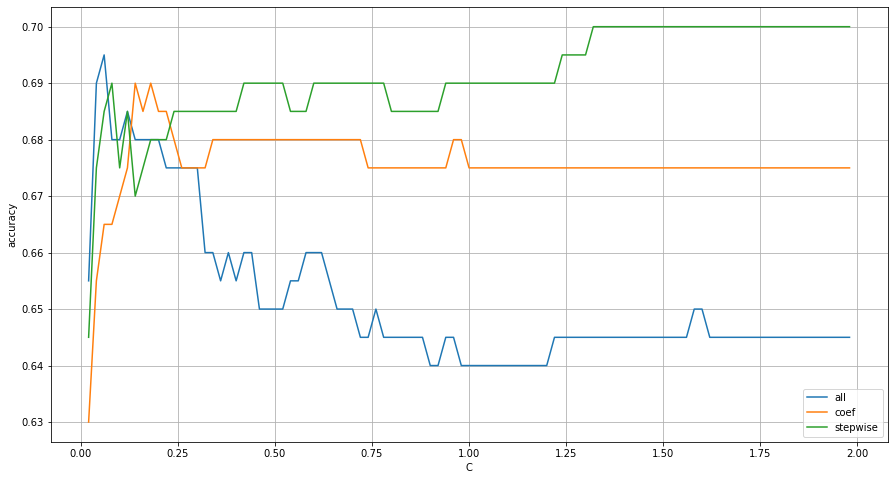

In [6]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()

In [8]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

svc=SVC(kernel='linear',C=0.06)
svc1=SVC(kernel='linear',C=0.14)
svc2=SVC(kernel='linear',C=1.4)

svc.fit(X_train,y1_train)
svc1.fit(X_train1,y1_train1)
svc2.fit(X_train2,y1_train2)

y_pred=svc.predict(X_test)
y_pred1=svc1.predict(X_test1)
y_pred2=svc2.predict(X_test2)

print("학습 데이터 점수 : {}".format(svc.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(svc.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(svc1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(svc1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(svc2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(svc2.score(X_test2,y1_test2)))

학습 데이터 점수 : 0.66375
평가 데이터 점수 : 0.695
학습 데이터 점수 : 0.64125
평가 데이터 점수 : 0.69
학습 데이터 점수 : 0.65625
평가 데이터 점수 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [9]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      90  14  1  0
2      28  42  0  0
3       4   9  3  1
4       0   3  1  4 
col_0   1   2  3  4
row_0              
1      88  16  1  0
2      26  43  1  0
3       4   9  3  1
4       0   1  3  4 
col_0   1   2  3  4
row_0              
1      90  14  1  0
2      27  42  1  0
3       4   8  4  1
4       0   1  3  4


In [10]:
#서포트 벡터 머신(분류) rbf
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,100):
    svc=SVC(kernel='rbf',C=i/10)
    svc1=SVC(kernel='rbf',C=i/10)
    svc2=SVC(kernel='rbf',C=i/10)

    svc.fit(X_train,y1_train)
    svc1.fit(X_train1,y1_train1)
    svc2.fit(X_train2,y1_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(svc.score(X_train,y1_train)))
    print("평가 데이터 점수 : {}".format(svc.score(X_test,y1_test)))
    print("학습 데이터 점수1 : {}".format(svc1.score(X_train1,y1_train1)))
    print("평가 데이터 점수1 : {}".format(svc1.score(X_test1,y1_test1)))
    print("학습 데이터 점수2 : {}".format(svc2.score(X_train2,y1_train2)))
    print("평가 데이터 점수2 : {}".format(svc2.score(X_test2,y1_test2)))
    t.loc[i-1]=[i/10,svc.score(X_test,y1_test)]
    t1.loc[i-1]=[i/10,svc1.score(X_test1,y1_test1)]
    t2.loc[i-1]=[i/10,svc2.score(X_test2,y1_test2)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

1
학습 데이터 점수 : 0.60625
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.61
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 0.6075
평가 데이터 점수2 : 0.665
2
학습 데이터 점수 : 0.64
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

3
학습 데이터 점수 : 0.675
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.66375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.66375
평가 데이터 점수2 : 0.685
4
학습 데이터 점수 : 0.695
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

5
학습 데이터 점수 : 0.71625
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.67375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.675
평가 데이터 점수2 : 0.7
6
학습 데이터 점수 : 0.7325
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.67875
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

7
학습 데이터 점수 : 0.74375
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.685
평가 데이터 점수2 : 0.705
8
학습 데이터 점수 : 0.75
평가 데이터 점수 : 0.7
학습 데이터 점수1 : 0.685
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.68625
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

9
학습 데이터 점수 : 0.7575
평가 데이터 점수 : 0.71
학습 데이터 점수1 : 0.68875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.68875
평가 데이터 점수2 : 0.7
10
학습 데이터 점수 : 0.76625
평가 데이터 점수 : 0.7
학습 데이터 점수1 : 0.69375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.68875
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

11
학습 데이터 점수 : 0.775
평가 데이터 점수 : 0.7
학습 데이터 점수1 : 0.70125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.695
평가 데이터 점수2 : 0.7
12
학습 데이터 점수 : 0.78
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.70125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.69
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

13
학습 데이터 점수 : 0.7825
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.7025
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.68875
평가 데이터 점수2 : 0.705
14
학습 데이터 점수 : 0.78875
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.70375
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.69375
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

15
학습 데이터 점수 : 0.7975
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.70875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6925
평가 데이터 점수2 : 0.71
16
학습 데이터 점수 : 0.79875
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.70875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.69375
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

17
학습 데이터 점수 : 0.80375
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7
평가 데이터 점수2 : 0.715
18
학습 데이터 점수 : 0.8075
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

19
학습 데이터 점수 : 0.81
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.72
20
학습 데이터 점수 : 0.8175
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

21
학습 데이터 점수 : 0.825
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.72
22
학습 데이터 점수 : 0.8275
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.725
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

23
학습 데이터 점수 : 0.83
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.715
24
학습 데이터 점수 : 0.83375
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

25
학습 데이터 점수 : 0.8375
평가 데이터 점수 : 0.7
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.715
26
학습 데이터 점수 : 0.83875
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.73375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

27
학습 데이터 점수 : 0.8375
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.73625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.715
28
학습 데이터 점수 : 0.84125
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.735
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.715
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

29
학습 데이터 점수 : 0.84375
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.735
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.71
30
학습 데이터 점수 : 0.84625
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.73625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.715
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

31
학습 데이터 점수 : 0.845
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7175
평가 데이터 점수2 : 0.72
32
학습 데이터 점수 : 0.845
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

33
학습 데이터 점수 : 0.85
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71875
평가 데이터 점수2 : 0.715
34
학습 데이터 점수 : 0.85
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71875
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

35
학습 데이터 점수 : 0.855
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.72
평가 데이터 점수2 : 0.715
36
학습 데이터 점수 : 0.8625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.72
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

37
학습 데이터 점수 : 0.865
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.72125
평가 데이터 점수2 : 0.72
38
학습 데이터 점수 : 0.8675
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.7225
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

39
학습 데이터 점수 : 0.8675
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7225
평가 데이터 점수2 : 0.715
40
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.73625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.72625
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

41
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73125
평가 데이터 점수2 : 0.715
42
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7325
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

43
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.735
평가 데이터 점수2 : 0.715
44
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

45
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.715
46
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73625
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

47
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.735
평가 데이터 점수2 : 0.715
48
학습 데이터 점수 : 0.87375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.735
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

49
학습 데이터 점수 : 0.87375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.73625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.735
평가 데이터 점수2 : 0.715
50
학습 데이터 점수 : 0.875
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.735
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

51
학습 데이터 점수 : 0.875
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73375
평가 데이터 점수2 : 0.715
52
학습 데이터 점수 : 0.88
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.735
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

53
학습 데이터 점수 : 0.88125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.735
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.715
54
학습 데이터 점수 : 0.88125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

55
학습 데이터 점수 : 0.8825
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.705
56
학습 데이터 점수 : 0.88625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

57
학습 데이터 점수 : 0.88875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705
58
학습 데이터 점수 : 0.8925
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73625
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

59
학습 데이터 점수 : 0.89375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73625
평가 데이터 점수2 : 0.705
60
학습 데이터 점수 : 0.89375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.735
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

61
학습 데이터 점수 : 0.895
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73625
평가 데이터 점수2 : 0.705
62
학습 데이터 점수 : 0.895
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

63
학습 데이터 점수 : 0.89625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705
64
학습 데이터 점수 : 0.8975
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.74125
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73625
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

65
학습 데이터 점수 : 0.89875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.74125
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.73625
평가 데이터 점수2 : 0.705
66
학습 데이터 점수 : 0.8975
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.745
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

67
학습 데이터 점수 : 0.89875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.74625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705
68
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.7475
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

69
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.74875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.705
70
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.74875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

71
학습 데이터 점수 : 0.90375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.74875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.705
72
학습 데이터 점수 : 0.90375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7475
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

73
학습 데이터 점수 : 0.905
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7475
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.705
74
학습 데이터 점수 : 0.90625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7475
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

75
학습 데이터 점수 : 0.90625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7475
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7425
평가 데이터 점수2 : 0.705
76
학습 데이터 점수 : 0.90625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7475
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

77
학습 데이터 점수 : 0.90625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.74875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.7
78
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.74875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

79
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.74875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.705
80
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.75125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

81
학습 데이터 점수 : 0.90875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7525
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7375
평가 데이터 점수2 : 0.695
82
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7525
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

83
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.75125
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.7
84
학습 데이터 점수 : 0.91375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.755
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73875
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

85
학습 데이터 점수 : 0.91375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.755
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74
평가 데이터 점수2 : 0.7
86
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.75625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

87
학습 데이터 점수 : 0.91875
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.75625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.695
88
학습 데이터 점수 : 0.91875
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.75625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

89
학습 데이터 점수 : 0.92
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7575
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.685
90
학습 데이터 점수 : 0.92125
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7575
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

91
학습 데이터 점수 : 0.9225
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.75625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.685
92
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7575
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7425
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

93
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7575
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74125
평가 데이터 점수2 : 0.685
94
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7575
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7425
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

95
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.76
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7425
평가 데이터 점수2 : 0.685
96
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.76
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7425
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

97
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.75875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74375
평가 데이터 점수2 : 0.685
98
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.76
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74375
평가 데이터 점수2 : 0.685
99
학습 데이터 점수 : 0.9275
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.75875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.74375
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


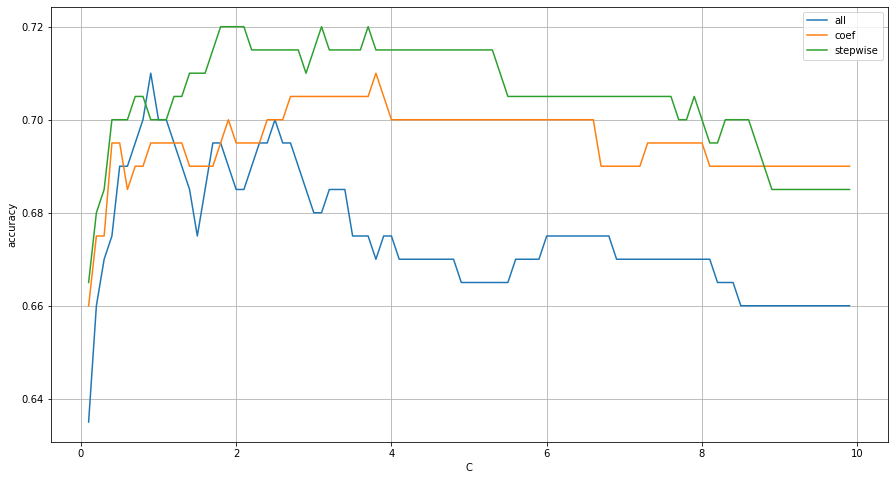

In [11]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()

In [12]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      90  14  1  0
2      28  42  0  0
3       4   9  3  1
4       0   3  1  4 
col_0   1   2  3  4
row_0              
1      88  16  1  0
2      26  43  1  0
3       4   9  3  1
4       0   1  3  4 
col_0   1   2  3  4
row_0              
1      90  14  1  0
2      27  42  1  0
3       4   8  4  1
4       0   1  3  4


In [13]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

svc=SVC(kernel='rbf',C=0.9)
svc1=SVC(kernel='rbf',C=3.8)
svc2=SVC(kernel='rbf',C=2)

svc.fit(X_train,y1_train)
svc1.fit(X_train1,y1_train1)
svc2.fit(X_train2,y1_train2)

y_pred=svc.predict(X_test)
y_pred1=svc1.predict(X_test1)
y_pred2=svc2.predict(X_test2)

print("학습 데이터 점수 : {}".format(svc.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(svc.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(svc1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(svc1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(svc2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(svc2.score(X_test2,y1_test2)))

학습 데이터 점수 : 0.7575
평가 데이터 점수 : 0.71
학습 데이터 점수 : 0.7375
평가 데이터 점수 : 0.71
학습 데이터 점수 : 0.70375
평가 데이터 점수 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
#서포트 벡터 머신(분류) poly
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
t_1=pd.DataFrame(columns=['i','score'])
t1_1=pd.DataFrame(columns=['i','score'])
t2_1=pd.DataFrame(columns=['i','score'])
t_2=pd.DataFrame(columns=['i','score'])
t1_2=pd.DataFrame(columns=['i','score'])
t2_2=pd.DataFrame(columns=['i','score'])

for k in range(2,5):
    for i in range(1,100):
        svc=SVC(kernel='poly',C=i/10, degree=k)
        svc1=SVC(kernel='poly',C=i/10, degree=k)
        svc2=SVC(kernel='poly',C=i/10, degree=k)

        svc.fit(X_train,y1_train)
        svc1.fit(X_train1,y1_train1)
        svc2.fit(X_train2,y1_train2)
        print(i)
        print("학습 데이터 점수 : {}".format(svc.score(X_train,y1_train)))
        print("평가 데이터 점수 : {}".format(svc.score(X_test,y1_test)))
        print("학습 데이터 점수1 : {}".format(svc1.score(X_train1,y1_train1)))
        print("평가 데이터 점수1 : {}".format(svc1.score(X_test1,y1_test1)))
        print("학습 데이터 점수2 : {}".format(svc2.score(X_train2,y1_train2)))
        print("평가 데이터 점수2 : {}".format(svc2.score(X_test2,y1_test2)))
        if(k==2):
            t.loc[i-1]=[i/10,svc.score(X_test,y1_test)]
            t1.loc[i-1]=[i/10,svc1.score(X_test1,y1_test1)]
            t2.loc[i-1]=[i/10,svc2.score(X_test2,y1_test2)]
        elif(k==3):
            t_1.loc[i-1]=[i/10,svc.score(X_test,y1_test)]
            t1_1.loc[i-1]=[i/10,svc1.score(X_test1,y1_test1)]
            t2_1.loc[i-1]=[i/10,svc2.score(X_test2,y1_test2)]
        elif(k==4):
            t_2.loc[i-1]=[i/10,svc.score(X_test,y1_test)]
            t1_2.loc[i-1]=[i/10,svc1.score(X_test1,y1_test1)]
            t2_2.loc[i-1]=[i/10,svc2.score(X_test2,y1_test2)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

1
학습 데이터 점수 : 0.5925
평가 데이터 점수 : 0.605
학습 데이터 점수1 : 0.57
평가 데이터 점수1 : 0.605
학습 데이터 점수2 : 0.59875
평가 데이터 점수2 : 0.65
2
학습 데이터 점수 : 0.64
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.6275
평가 데이터 점수2 : 0.675
3
학습 데이터 점수 : 0.6675

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.64125
평가 데이터 점수2 : 0.71
4
학습 데이터 점수 : 0.68375
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.6325
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.65125
평가 데이터 점수2 : 0.72
5
학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.73
6
학습 데이터 점수 : 0.70125
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.64875
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.73
7
학습 데이터 점수 : 0.715
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.65125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.735


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

8
학습 데이터 점수 : 0.71875
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.73
9
학습 데이터 점수 : 0.7325
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.65125
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.73
10
학습 데이터 점수 : 0.7375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.65375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.73
11
학습 데이터 점수 : 0.74
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.6575
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.73
12
학습 데이터 점수 : 0.74125
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.65375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.6575

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.73
13
학습 데이터 점수 : 0.75
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.65375
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.73
14
학습 데이터 점수 : 0.7525
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.65375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.73


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

15
학습 데이터 점수 : 0.755
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.65625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.73
16
학습 데이터 점수 : 0.7575
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.65875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.6625
평가 데이터 점수2 : 0.73
17
학습 데이터 점수 : 0.75875
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.6575
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.6625
평가 데이터 점수2 : 0.73
18
학습 데이터 점수 : 0.7625
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.65875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.735
19
학습 데이터 점수 : 0.76375
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.66


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.735
20
학습 데이터 점수 : 0.765
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.65875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.735
21
학습 데이터 점수 : 0.76625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66375

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.735
22
학습 데이터 점수 : 0.76625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.66625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66375
평가 데이터 점수2 : 0.73
23
학습 데이터 점수 : 0.76625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.66625
평가 데이터 점수1 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.73
24
학습 데이터 점수 : 0.76875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.66875
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.73
25
학습 데이터 점수 : 0.76375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.6675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.73
26
학습 데이터 점수 : 0.76375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.73
27
학습 데이터 점수 : 0.76375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.67

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.73
28
학습 데이터 점수 : 0.76875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.67
평가 데이터 점수2 : 0.73
29
학습 데이터 점수 : 0.77125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.67
평가 데이터 점수2 : 0.735
30
학습 데이터 점수 : 0.77375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.66875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.67125
평가 데이터 점수2 : 0.735
31
학습 데이터 점수 : 0.77625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.66875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.735
32
학습 데이터 점수 : 0.77625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.735
33
학습 데이터 점수 : 0.77875
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.67125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66625

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.735
34
학습 데이터 점수 : 0.78
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.735
35
학습 데이터 점수 : 0.7825
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6725
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.665


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.73
36
학습 데이터 점수 : 0.78375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66375
평가 데이터 점수2 : 0.73
37
학습 데이터 점수 : 0.785


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66375
평가 데이터 점수2 : 0.73
38
학습 데이터 점수 : 0.785
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.73
39
학습 데이터 점수 : 0.78625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.725
40
학습 데이터 점수 : 0.78875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.725
41

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수 : 0.78875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.725
42
학습 데이터 점수 : 0.78875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

43
학습 데이터 점수 : 0.79125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72
44
학습 데이터 점수 : 0.79125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

45
학습 데이터 점수 : 0.795
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
46
학습 데이터 점수 : 0.79625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.67
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

47
학습 데이터 점수 : 0.7975
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.67625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
48
학습 데이터 점수 : 0.7975
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
49
학습 데이터 점수 : 0.79625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.67625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
50
학습 데이터 점수 : 0.795
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

51
학습 데이터 점수 : 0.79625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
52
학습 데이터 점수 : 0.7975
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
53


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.8
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72
54
학습 데이터 점수 : 0.80125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
55


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.8025
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
56
학습 데이터 점수 : 0.8025
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
57


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.80375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
58
학습 데이터 점수 : 0.805
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
59


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.805
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
60
학습 데이터 점수 : 0.80375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

61
학습 데이터 점수 : 0.805
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
62
학습 데이터 점수 : 0.80625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

63
학습 데이터 점수 : 0.80625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
64
학습 데이터 점수 : 0.80875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

65
학습 데이터 점수 : 0.81
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
66
학습 데이터 점수 : 0.81125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

67
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
68
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

69
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
70
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

71
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
72
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

73
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72
74
학습 데이터 점수 : 0.815
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

75
학습 데이터 점수 : 0.8175
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
76
학습 데이터 점수 : 0.8175
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

77
학습 데이터 점수 : 0.8175
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72
78
학습 데이터 점수 : 0.81875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

79
학습 데이터 점수 : 0.81875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72
80
학습 데이터 점수 : 0.81875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

81
학습 데이터 점수 : 0.82
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72
82
학습 데이터 점수 : 0.82
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

83
학습 데이터 점수 : 0.82125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
84
학습 데이터 점수 : 0.82125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

85
학습 데이터 점수 : 0.81875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66625
평가 데이터 점수2 : 0.72
86
학습 데이터 점수 : 0.82
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

87
학습 데이터 점수 : 0.82125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
88
학습 데이터 점수 : 0.8225
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6675
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

89
학습 데이터 점수 : 0.8225
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.72
90
학습 데이터 점수 : 0.8225
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.67
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

91
학습 데이터 점수 : 0.8225
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.67
평가 데이터 점수2 : 0.72
92
학습 데이터 점수 : 0.8225
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

93
학습 데이터 점수 : 0.8225
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.72
94
학습 데이터 점수 : 0.82375
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

95
학습 데이터 점수 : 0.8275
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.72
96
학습 데이터 점수 : 0.8275
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

97
학습 데이터 점수 : 0.82875
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.67375
평가 데이터 점수2 : 0.72
98
학습 데이터 점수 : 0.83
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.67375
평가 데이터 점수2 : 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

99
학습 데이터 점수 : 0.82875
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.6775
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.67375
평가 데이터 점수2 : 0.72
1
학습 데이터 점수 : 0.5725
평가 데이터 점수 : 0.575
학습 데이터 점수1 : 0.57
평가 데이터 점수1 : 0.575
학습 데이터 점수2 : 0.60375
평가 데이터 점수2 : 0.64
2
학습 데이터 점수 : 0.63125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.625
학습 데이터 점수1 : 0.6
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.63625
평가 데이터 점수2 : 0.66
3
학습 데이터 점수 : 0.66
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.615
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.68
4
학습 데이터 점수 : 0.69
평가 데이터 점수 : 0.645

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수1 : 0.635
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.68
5
학습 데이터 점수 : 0.7175
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.65
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 0.67125
평가 데이터 점수2 : 0.675
6
학습 데이터 점수 : 0.7375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.6725
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.675

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.68
7
학습 데이터 점수 : 0.75375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.68375
평가 데이터 점수2 : 0.68
8
학습 데이터 점수 : 0.7575
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.68
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.6875
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

9
학습 데이터 점수 : 0.7625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.67875
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.69
평가 데이터 점수2 : 0.69
10
학습 데이터 점수 : 0.76875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.69375
평가 데이터 점수2 : 0.68
11
학습 데이터 점수 : 0.77375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.69375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.68875
평가 데이터 점수2 : 0.695
12
학습 데이터 점수 : 0.78125
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.69375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.68875
평가 데이터 점수2 : 0.685
13
학습 데이터 점수 : 0.7875
평가 데이터 점수 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수1 : 0.69375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.6925
평가 데이터 점수2 : 0.695
14
학습 데이터 점수 : 0.79125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.695
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.695
평가 데이터 점수2 : 0.7
15
학습 데이터 점수 : 0.8
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6975
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.69875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.705
16
학습 데이터 점수 : 0.80375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.6975
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.70125
평가 데이터 점수2 : 0.705
17
학습 데이터 점수 : 0.805
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.69875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.69875
평가 데이터 점수2 : 0.695
18
학습 데이터 점수 : 0.80625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7025
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7
평가 데이터 점수2 : 0.695
19
학습 데이터 점수 : 0.81
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7025


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.69
20
학습 데이터 점수 : 0.81375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.7025
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.695
21
학습 데이터 점수 : 0.8125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.70125
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.695
22
학습 데이터 점수 : 0.81625
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.7
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.695
23
학습 데이터 점수 : 0.82


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.69
24
학습 데이터 점수 : 0.825
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.70375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.69
25
학습 데이터 점수 : 0.8325


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.705
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.705
평가 데이터 점수2 : 0.695
26
학습 데이터 점수 : 0.835
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.70375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.705
평가 데이터 점수2 : 0.695
27


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.84125
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.705
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.7
28
학습 데이터 점수 : 0.84125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7025
평가 데이터 점수1 : 0.715
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.695
29
학습 데이터 점수 : 0.84125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.705
평가 데이터 점수1 : 0.715
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.695
30
학습 데이터 점수 : 0.84125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

31
학습 데이터 점수 : 0.845
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71
평가 데이터 점수1 : 0.715
학습 데이터 점수2 : 0.705
평가 데이터 점수2 : 0.69
32
학습 데이터 점수 : 0.845
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71
평가 데이터 점수1 : 0.715
학습 데이터 점수2 : 0.705
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

33
학습 데이터 점수 : 0.85125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71
평가 데이터 점수1 : 0.715
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.69
34
학습 데이터 점수 : 0.85625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.7075
평가 데이터 점수1 : 0.715
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

35
학습 데이터 점수 : 0.86
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.7075
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.69
36
학습 데이터 점수 : 0.86
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7075
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

37
학습 데이터 점수 : 0.86
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.69
38
학습 데이터 점수 : 0.86375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.70875
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

39
학습 데이터 점수 : 0.86375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7075
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.685
40
학습 데이터 점수 : 0.8675
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

41
학습 데이터 점수 : 0.86875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71
평가 데이터 점수2 : 0.685
42
학습 데이터 점수 : 0.86875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

43
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71
평가 데이터 점수2 : 0.685
44
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

45
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.685
46
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

47
학습 데이터 점수 : 0.8725
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.685
48
학습 데이터 점수 : 0.87375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.71125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

49
학습 데이터 점수 : 0.87375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.71125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71125
평가 데이터 점수2 : 0.685
50
학습 데이터 점수 : 0.875
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71125
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

51
학습 데이터 점수 : 0.8775
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.68
52
학습 데이터 점수 : 0.885
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.715
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

53
학습 데이터 점수 : 0.88625
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.68
54
학습 데이터 점수 : 0.8875
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

55
학습 데이터 점수 : 0.8875
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.685
56
학습 데이터 점수 : 0.89125
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

57
학습 데이터 점수 : 0.89125
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695
58
학습 데이터 점수 : 0.8925
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

59
학습 데이터 점수 : 0.89375
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.7
60
학습 데이터 점수 : 0.895
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

61
학습 데이터 점수 : 0.89625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.7
62
학습 데이터 점수 : 0.89875
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

63
학습 데이터 점수 : 0.9
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71125
평가 데이터 점수2 : 0.7
64
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

65
학습 데이터 점수 : 0.90375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695
66
학습 데이터 점수 : 0.905
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

67
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695
68
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

69
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.71125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695
70
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

71
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695
72
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

73
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.695
74
학습 데이터 점수 : 0.91125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

75
학습 데이터 점수 : 0.91125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695
76
학습 데이터 점수 : 0.91125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.7
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

77
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.695
78
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.715
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

79
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.715
평가 데이터 점수2 : 0.695
80
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

81
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695
82
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

83
학습 데이터 점수 : 0.91375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695
84
학습 데이터 점수 : 0.91375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

85
학습 데이터 점수 : 0.91375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695
86
학습 데이터 점수 : 0.91375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.7175
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

87
학습 데이터 점수 : 0.915
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695
88
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

89
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.7175
평가 데이터 점수2 : 0.695
90
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

91
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7
92
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

93
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.7175
평가 데이터 점수2 : 0.7
94
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

95
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7
96
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

97
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7
98
학습 데이터 점수 : 0.9175
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


99
학습 데이터 점수 : 0.9175
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.71
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.7
1
학습 데이터 점수 : 0.57375
평가 데이터 점수 : 0.55
학습 데이터 점수1 : 0.56375
평가 데이터 점수1 : 0.565
학습 데이터 점수2 : 0.6
평가 데이터 점수2 : 0.63
2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수 : 0.61875
평가 데이터 점수 : 0.56
학습 데이터 점수1 : 0.59875
평가 데이터 점수1 : 0.595
학습 데이터 점수2 : 0.62125
평가 데이터 점수2 : 0.645
3
학습 데이터 점수 : 0.665
평가 데이터 점수 : 0.59
학습 데이터 점수1 : 0.6175
평가 데이터 점수1 : 0.62
학습 데이터 점수2 : 0.63625
평가 데이터 점수2 : 0.66
4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.685
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.63125
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.6425
평가 데이터 점수2 : 0.655
5
학습 데이터 점수 : 0.7125
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.6425
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.68
6
학습 데이터 점수 : 0.73875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.645
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.68
7
학습 데이터 점수 : 0.75125
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.65125
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.665
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

8
학습 데이터 점수 : 0.7625
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.65375
평가 데이터 점수1 : 0.645
학습 데이터 점수2 : 0.66875
평가 데이터 점수2 : 0.67
9
학습 데이터 점수 : 0.77125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.65875
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.665


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10
학습 데이터 점수 : 0.7775
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.6675
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.6725
평가 데이터 점수2 : 0.68
11
학습 데이터 점수 : 0.79125
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.67125
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.675
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

12
학습 데이터 점수 : 0.79875
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.68
평가 데이터 점수2 : 0.675
13
학습 데이터 점수 : 0.805
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.675
평가 데이터 점수1 : 0.645
학습 데이터 점수2 : 0.68
평가 데이터 점수2 : 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

14
학습 데이터 점수 : 0.81
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6825
평가 데이터 점수1 : 0.645
학습 데이터 점수2 : 0.68375
평가 데이터 점수2 : 0.67
15
학습 데이터 점수 : 0.815
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6875
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.6825
평가 데이터 점수2 : 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

16
학습 데이터 점수 : 0.82125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.69
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.685
평가 데이터 점수2 : 0.67
17
학습 데이터 점수 : 0.82625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6925
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.68625
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

18
학습 데이터 점수 : 0.82875
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.69375
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.6875
평가 데이터 점수2 : 0.675
19
학습 데이터 점수 : 0.83125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.69375
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.6875
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

20
학습 데이터 점수 : 0.83375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6925
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.68875
평가 데이터 점수2 : 0.675
21
학습 데이터 점수 : 0.8375
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.695
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.69125
평가 데이터 점수2 : 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

22
학습 데이터 점수 : 0.84125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.69625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.69375
평가 데이터 점수2 : 0.67
23
학습 데이터 점수 : 0.8425
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.69625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.69375
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

24
학습 데이터 점수 : 0.84375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.695
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.69625
평가 데이터 점수2 : 0.675
25
학습 데이터 점수 : 0.84625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.69625
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

26
학습 데이터 점수 : 0.85125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7025
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.69625
평가 데이터 점수2 : 0.675
27
학습 데이터 점수 : 0.855
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.7025
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.6975
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

28
학습 데이터 점수 : 0.85625
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.70625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.69875
평가 데이터 점수2 : 0.68
29
학습 데이터 점수 : 0.8575
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.70625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

30
학습 데이터 점수 : 0.86375
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7075
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.70125
평가 데이터 점수2 : 0.68
31
학습 데이터 점수 : 0.8675
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.70875
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.70125
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

32
학습 데이터 점수 : 0.87
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.71
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.7025
평가 데이터 점수2 : 0.685
33
학습 데이터 점수 : 0.87125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

34
학습 데이터 점수 : 0.87375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.70375
평가 데이터 점수2 : 0.685
35
학습 데이터 점수 : 0.87375
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

36
학습 데이터 점수 : 0.875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.705
평가 데이터 점수2 : 0.685
37
학습 데이터 점수 : 0.88
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.71375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

38
학습 데이터 점수 : 0.8825
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.7125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.70625
평가 데이터 점수2 : 0.69
39
학습 데이터 점수 : 0.885
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7075
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

40
학습 데이터 점수 : 0.8875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.715
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.70875
평가 데이터 점수2 : 0.69
41
학습 데이터 점수 : 0.89
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.71625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

42
학습 데이터 점수 : 0.89125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.7175
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71125
평가 데이터 점수2 : 0.695
43
학습 데이터 점수 : 0.8925
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.71875
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71125
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

44
학습 데이터 점수 : 0.8925
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.72
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.69
45
학습 데이터 점수 : 0.8925
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.72
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7125
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

46
학습 데이터 점수 : 0.895
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.72
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.69
47
학습 데이터 점수 : 0.89625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.72
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

48
학습 데이터 점수 : 0.89875
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.72125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.69
49
학습 데이터 점수 : 0.9
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.72375
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

50
학습 데이터 점수 : 0.9
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7225
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.69
51
학습 데이터 점수 : 0.9
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7225
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71375
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

52
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7225
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.715
평가 데이터 점수2 : 0.685
53
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.725
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7175
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

54
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.725
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71625
평가 데이터 점수2 : 0.685
55
학습 데이터 점수 : 0.9025
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.72625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.72
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

56
학습 데이터 점수 : 0.90375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.72625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.72
평가 데이터 점수2 : 0.69
57
학습 데이터 점수 : 0.90625
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.72625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71875
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

58
학습 데이터 점수 : 0.90625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.72625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.71875
평가 데이터 점수2 : 0.69
59
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.7275
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

60
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7275
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7225
평가 데이터 점수2 : 0.69
61
학습 데이터 점수 : 0.9075
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.72875
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7225
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

62
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7275
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.69
63
학습 데이터 점수 : 0.91
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.72875
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

64
학습 데이터 점수 : 0.91125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.72875
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.69
65
학습 데이터 점수 : 0.91125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.725
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

66
학습 데이터 점수 : 0.91125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.69
67
학습 데이터 점수 : 0.9125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

68
학습 데이터 점수 : 0.915
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.685
69
학습 데이터 점수 : 0.915
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72375
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

70
학습 데이터 점수 : 0.915
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.725
평가 데이터 점수2 : 0.685
71
학습 데이터 점수 : 0.91625
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72625
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

72
학습 데이터 점수 : 0.9175
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72625
평가 데이터 점수2 : 0.69
73
학습 데이터 점수 : 0.92
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72625
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

74
학습 데이터 점수 : 0.9225
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72625
평가 데이터 점수2 : 0.69
75
학습 데이터 점수 : 0.9225
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7275
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

76
학습 데이터 점수 : 0.9225
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7275
평가 데이터 점수2 : 0.685
77
학습 데이터 점수 : 0.925
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수2 : 0.685
78
학습 데이터 점수 : 0.92625
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72875
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

79
학습 데이터 점수 : 0.9275
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69
80
학습 데이터 점수 : 0.92875
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69
81
학습 데이터 점수 : 0.93125
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73125
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

82
학습 데이터 점수 : 0.9325
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69
83
학습 데이터 점수 : 0.9325
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

84
학습 데이터 점수 : 0.9325
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73125
평가 데이터 점수2 : 0.69
85
학습 데이터 점수 : 0.9325
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

86
학습 데이터 점수 : 0.9325
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69
87
학습 데이터 점수 : 0.93375
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.73125
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72875
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

88
학습 데이터 점수 : 0.93625
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 0.7325
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.72875
평가 데이터 점수2 : 0.69
89
학습 데이터 점수 : 0.93625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73375
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.69
90
학습 데이터 점수 : 0.93625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.735
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

91
학습 데이터 점수 : 0.93625
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.735
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.685
92
학습 데이터 점수 : 0.9375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.7275
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

93
학습 데이터 점수 : 0.93875
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73625
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.7275
평가 데이터 점수2 : 0.68
94
학습 데이터 점수 : 0.94125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.69

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수2 : 0.7275
평가 데이터 점수2 : 0.68
95
학습 데이터 점수 : 0.94125
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.72875
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

96
학습 데이터 점수 : 0.9425
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.73875
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.72875
평가 데이터 점수2 : 0.68
97
학습 데이터 점수 : 0.94375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

98
학습 데이터 점수 : 0.94375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.68
99
학습 데이터 점수 : 0.94375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.74
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 0.73
평가 데이터 점수2 : 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


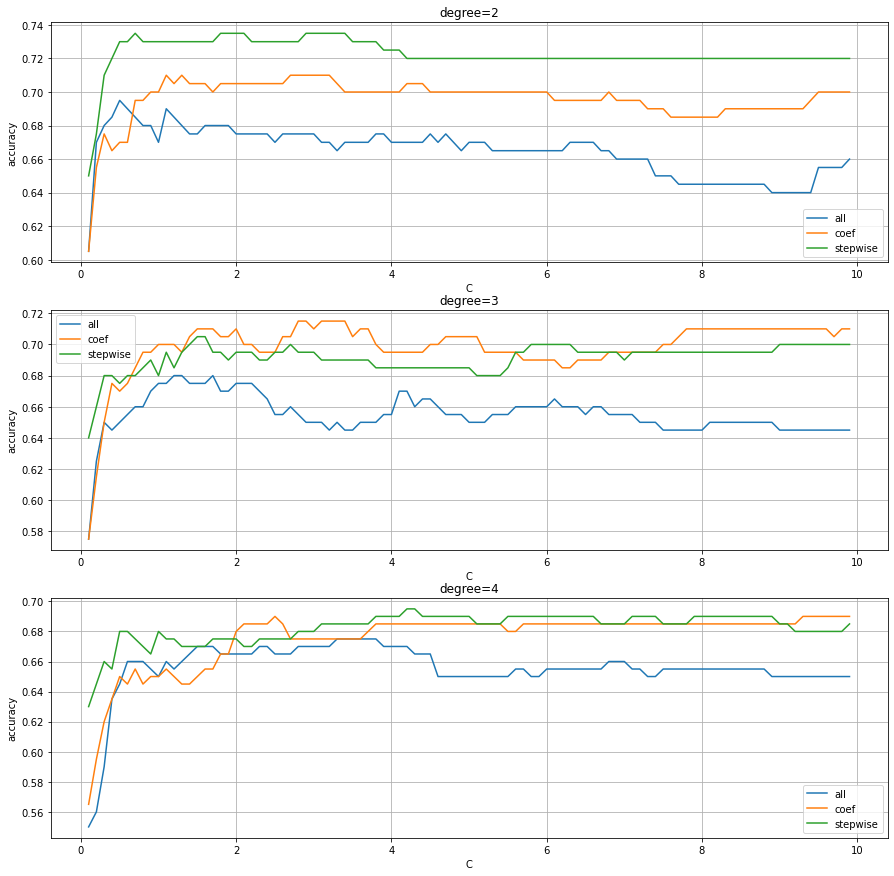

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(311)
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.grid()
plt.title("degree=2")
plt.legend()
plt.subplot(312)
plt.plot(t_1[['i']],t_1[['score']],label="all")
plt.plot(t1_1[['i']],t1_1[['score']],label="coef")
plt.plot(t2_1[['i']],t2_1[['score']],label="stepwise")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.grid()
plt.title("degree=3")
plt.legend()
plt.subplot(313)
plt.plot(t_2[['i']],t_2[['score']],label="all")
plt.plot(t1_2[['i']],t1_2[['score']],label="coef")
plt.plot(t2_2[['i']],t2_2[['score']],label="stepwise")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.grid()
plt.title("degree=4")
plt.legend()

In [16]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      90  15  0  0
2      25  44  1  0
3       3   9  4  1
4       0   3  1  4 
col_0   1   2  3  4
row_0              
1      91  14  0  0
2      27  41  2  0
3       4   7  6  0
4       0   0  4  4 
col_0   1   2  3  4
row_0              
1      92  13  0  0
2      25  43  2  0
3       4   8  5  0
4       0   3  1  4


In [17]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

svc=SVC(kernel='poly',C=0.5, degree=2)
svc1=SVC(kernel='poly',C=3.3, degree=3)
svc2=SVC(kernel='poly',C=1.9, degree=2)

svc.fit(X_train,y1_train)
svc1.fit(X_train1,y1_train1)
svc2.fit(X_train2,y1_train2)

y_pred=svc.predict(X_test)
y_pred1=svc1.predict(X_test1)
y_pred2=svc2.predict(X_test2)

print("학습 데이터 점수 : {}".format(svc.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(svc.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(svc1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(svc1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(svc2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(svc2.score(X_test2,y1_test2)))

학습 데이터 점수 : 0.69125
평가 데이터 점수 : 0.695
학습 데이터 점수 : 0.71
평가 데이터 점수 : 0.715
학습 데이터 점수 : 0.665
평가 데이터 점수 : 0.735


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


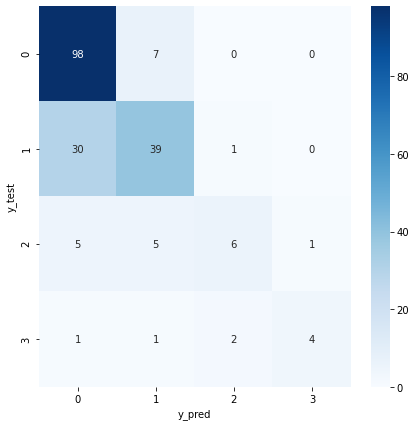

In [18]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y1_test2,y_pred2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [19]:
print(classification_report(y1_test2,y_pred2,target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       105
           1       0.75      0.56      0.64        70
           2       0.67      0.35      0.46        17
           3       0.80      0.50      0.62         8

    accuracy                           0.73       200
   macro avg       0.74      0.59      0.63       200
weighted avg       0.74      0.73      0.72       200



In [20]:
# 서포트 벡터 머신(회귀) linear
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='linear'))])
param_grid=[{'model__C' : [250000,260000,270000,280000,290000,300000,310000,320000,330000,340000,350000],
            'model__epsilon' : [10000,20000,30000,40000,50000,60000,70000]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train,y_train)

print(gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 340000, 'model__epsilon': 30000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='linear'))])
param_grid=[{'model__C' : [300000,310000,320000,330000,340000,350000,360000,370000,380000,390000,400000],
            'model__epsilon' : [150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train1,y_train1)

print(gs.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 390000, 'model__epsilon': 240000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='linear'))])
param_grid=[{'model__C' : [250000,260000,270000,280000,290000,300000,310000,320000,330000,340000,350000],
            'model__epsilon' : [950000,960000,970000,980000,990000,1000000,1010000,1020000,1030000,1040000,1050000]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train2,y_train2)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 300000, 'model__epsilon': 990000}

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

svr_linear=SVR(kernel='linear',C=340000, epsilon=30000)
svr_linear1=SVR(kernel='linear',C=390000, epsilon=240000)
svr_linear2=SVR(kernel='linear',C=300000, epsilon=900000)

svr_linear.fit(X_train,y_train)
svr_linear1.fit(X_train1,y_train1)
svr_linear2.fit(X_train2,y_train2)
y_pred=svr_linear.predict(X_test)
y_pred1=svr_linear1.predict(X_test1)
y_pred2=svr_linear2.predict(X_test2)
for i in range(0,199):
    if y_pred[i]<0:
        y_pred[i]=0
    if y_pred1[i]<0:
        y_pred1[i]=0
    if y_pred2[i]<0:
        y_pred2[i]=0
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print("학습 데이터 점수 : {}".format(svr_linear.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(svr_linear.score(X_test,y_test)))
print("rmse : {}".format(rmse))


print("학습 데이터 점수 : {}".format(svr_linear1.score(X_train1,y_train1)))
print("평가 데이터 점수 : {}".format(svr_linear1.score(X_test1,y_test1)))
print("rmse1 : {}".format(rmse1))


print("학습 데이터 점수 : {}".format(svr_linear2.score(X_train2,y_train2)))
print("평가 데이터 점수 : {}".format(svr_linear2.score(X_test2,y_test2)))
print("rmse2 : {}".format(rmse2))


학습 데이터 점수 : 0.6030766848760076
평가 데이터 점수 : 0.5375840082836607
rmse : 1408846.198598428
학습 데이터 점수 : 0.5906176454249237
평가 데이터 점수 : 0.5385185889495949
rmse1 : 1406458.185326659
학습 데이터 점수 : 0.5989316215435622
평가 데이터 점수 : 0.5213185932503326
rmse2 : 1425472.372685638


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


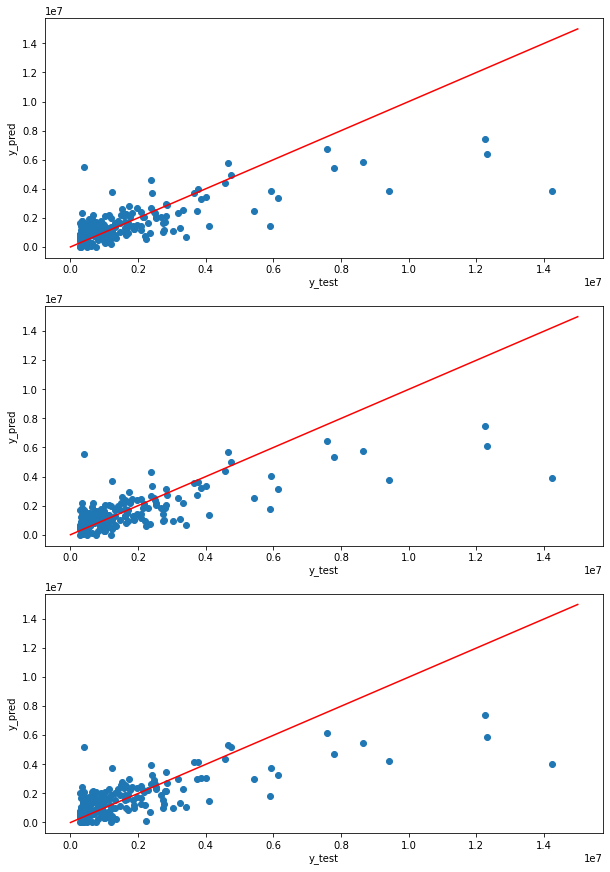

In [25]:
n=np.arange(0,15000000)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.scatter(y_test,y_pred,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(312)
plt.scatter(y_test1,y_pred1,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(313)
plt.scatter(y_test2,y_pred2, marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.show()

In [26]:
#서포트 벡터 머신(회귀) rbf
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='rbf'))])
param_grid=[{'model__C' : [4000000,4100000,4200000,4300000,4400000,4500000,4600000,4700000,4800000,4900000,5000000],
            'model__epsilon' : [100000,150000,200000,250000,300000,350000,400000,450000,500000]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train,y_train)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 4800000, 'model__epsilon': 450000}

In [27]:
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='rbf'))])
param_grid=[{'model__C' : [3000000,3100000,3200000,3300000,3400000,3500000,3600000,3700000,3800000,3900000,4000000],
            'model__epsilon' : [600000,610000,620000,630000,640000,650000,660000,670000,680000,690000,700000]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train1,y_train1)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 3800000, 'model__epsilon': 650000}

In [28]:
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='rbf'))])
param_grid=[{'model__C' : [2000000,2100000,2200000,2300000,2400000,2500000,2600000,2700000,2800000,2900000,3000000],
            'model__epsilon' : [450000,460000,470000,480000,390000,500000,510000,520000,530000,540000,550000]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train2,y_train2)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 2700000, 'model__epsilon': 470000}

In [29]:
#서포트 벡터 머신(회귀) rbf
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

svr_rbf=SVR(kernel='rbf',C=4800000, epsilon=450000)
svr_rbf1=SVR(kernel='rbf',C=3800000, epsilon=650000)
svr_rbf2=SVR(kernel='rbf',C=2700000, epsilon=400000)

svr_rbf.fit(X_train,y_train)
svr_rbf1.fit(X_train1,y_train1)
svr_rbf2.fit(X_train2,y_train2)
y_pred=svr_rbf.predict(X_test)
y_pred1=svr_rbf1.predict(X_test1)
y_pred2=svr_rbf2.predict(X_test2)
for i in range(0,199):
    if y_pred[i]<0:
        y_pred[i]=0
    if y_pred1[i]<0:
        y_pred1[i]=0
    if y_pred2[i]<0:
        y_pred2[i]=0
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print("학습 데이터 점수 : {}".format(svr_rbf.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(svr_rbf.score(X_test,y_test)))
print("rmse : {}".format(rmse))


print("학습 데이터 점수 : {}".format(svr_rbf1.score(X_train1,y_train1)))
print("평가 데이터 점수 : {}".format(svr_rbf1.score(X_test1,y_test1)))
print("rmse1 : {}".format(rmse1))


print("학습 데이터 점수 : {}".format(svr_rbf2.score(X_train2,y_train2)))
print("평가 데이터 점수 : {}".format(svr_rbf2.score(X_test2,y_test2)))
print("rmse2 : {}".format(rmse2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


학습 데이터 점수 : 0.7963417469887882
평가 데이터 점수 : 0.5683870286546273
rmse : 1363158.3352783513
학습 데이터 점수 : 0.6958004184582112
평가 데이터 점수 : 0.6045960814921985
rmse1 : 1304961.185171337
학습 데이터 점수 : 0.6940394300151307
평가 데이터 점수 : 0.6238729062732402
rmse2 : 1272753.8483679942


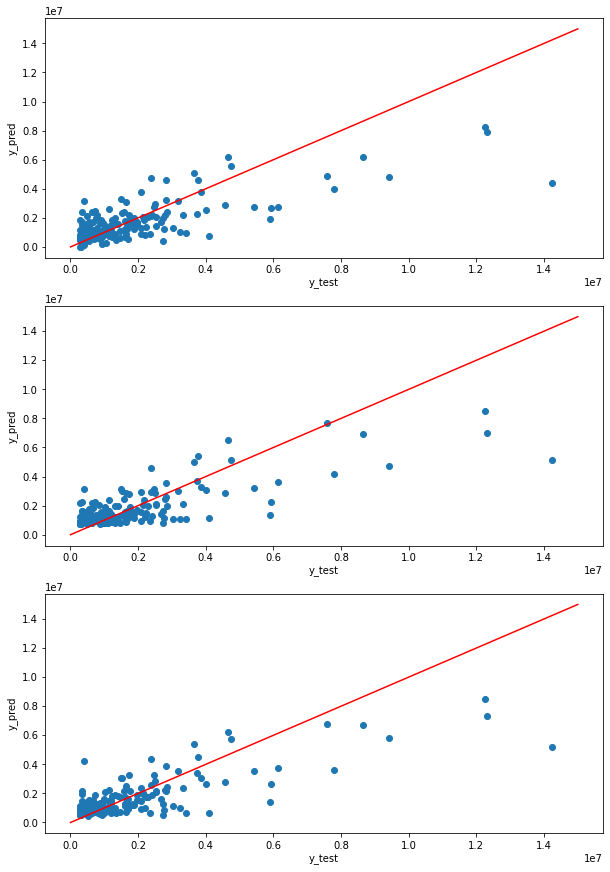

In [30]:
n=np.arange(0,15000000)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.scatter(y_test,y_pred,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(312)
plt.scatter(y_test1,y_pred1,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(313)
plt.scatter(y_test2,y_pred2, marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.show()

In [31]:
#서포트 벡터 머신(회귀) poly
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='poly', degree=3))])
param_grid=[{'model__C' : [800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000],
            'model__epsilon' : [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],
            'model__degree' : [2,3,4]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train,y_train)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 1800000, 'model__degree': 3, 'model__epsilon': 400000}

In [33]:
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='poly'))])
param_grid=[{'model__C' : [700000,710000,720000,730000,740000,750000,760000,770000,780000,790000,800000],
            'model__epsilon' : [700000,710000,720000,730000,740000,750000,760000,770000,780000,790000,800000],
            'model__degree' : [2,3,4]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train1,y_train1)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 710000, 'model__degree': 3, 'model__epsilon': 750000}

In [34]:
pipe=Pipeline([('scaler',scaler),('model',SVR(kernel='poly'))])
param_grid=[{'model__C' : [200000,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000],
            'model__epsilon' : [550000,560000,570000,580000,590000,600000,610000,620000,630000,640000,650000],
            'model__degree' : [2,3,4]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    verbose=0)
gs.fit(X_train2,y_train2)

gs.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

{'model__C': 220000, 'model__degree': 3, 'model__epsilon': 640000}

In [35]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

svr_poly=SVR(kernel='poly',C=1800000, epsilon=400000)
svr_poly1=SVR(kernel='poly',C=710000, epsilon=750000)
svr_poly2=SVR(kernel='poly',C=220000, epsilon=640000)

svr_poly.fit(X_train,y_train)
svr_poly1.fit(X_train1,y_train1)
svr_poly2.fit(X_train2,y_train2)
y_pred=svr_poly.predict(X_test)
y_pred1=svr_poly1.predict(X_test1)
y_pred2=svr_poly2.predict(X_test2)
for i in range(0,199):
    if y_pred[i]<0:
        y_pred[i]=0
    if y_pred1[i]<0:
        y_pred1[i]=0
    if y_pred2[i]<0:
        y_pred2[i]=0
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print("학습 데이터 점수 : {}".format(svr_poly.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(svr_poly.score(X_test,y_test)))
print("rmse : {}".format(rmse))


print("학습 데이터 점수 : {}".format(svr_poly1.score(X_train1,y_train1)))
print("평가 데이터 점수 : {}".format(svr_poly1.score(X_test1,y_test1)))
print("rmse1 : {}".format(rmse1))


print("학습 데이터 점수 : {}".format(svr_poly2.score(X_train2,y_train2)))
print("평가 데이터 점수 : {}".format(svr_poly2.score(X_test2,y_test2)))
print("rmse2 : {}".format(rmse2))

학습 데이터 점수 : 0.7547280195420394
평가 데이터 점수 : 0.5295299543931182
rmse : 1418328.9596155244
학습 데이터 점수 : 0.6314730764036953
평가 데이터 점수 : 0.6156912120990585
rmse1 : 1280352.7627941754
학습 데이터 점수 : 0.6009424640570834
평가 데이터 점수 : 0.5890012105923139
rmse2 : 1327775.9818684228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


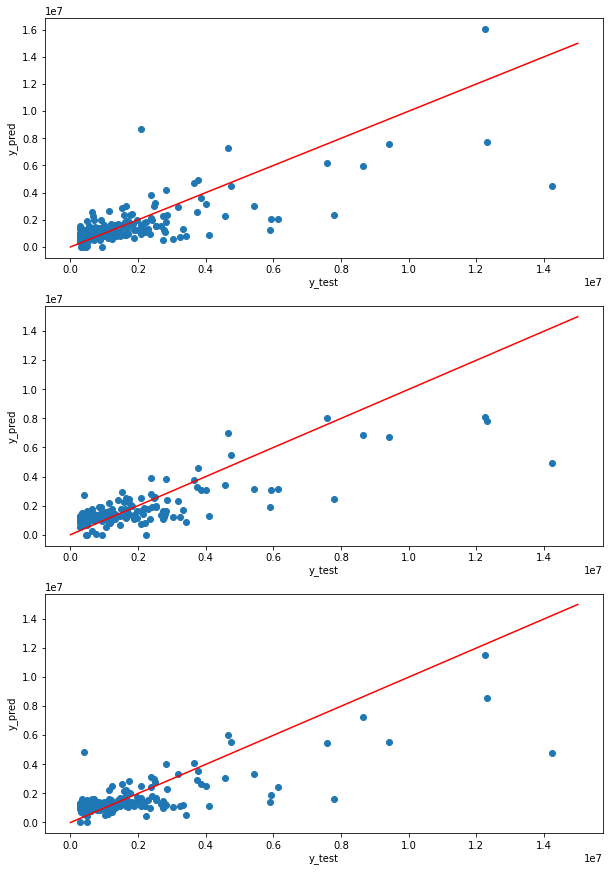

In [36]:
n=np.arange(0,15000000)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.scatter(y_test,y_pred,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(312)
plt.scatter(y_test1,y_pred1,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(313)
plt.scatter(y_test2,y_pred2, marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.show()